This notebook processes the UV-vis data from 9/8/24 (Batch 5) of Spincoated P3HT in DCB on PDMS.
There are two samples (S5 and S6)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_polarized_UVvis(_df, bw=None, ylim=(0,1.05),title="", plot_transmittance = False):
    # Set up figure with 3 subplots for polarized and unpolarized UV-vis data
    fig, axs = plt.subplots(3, 1, figsize=(8, 10))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    if plot_transmittance:
        for i, column in enumerate([col for col in _df.columns if 'Wavelength' not in col]):
            print(column)
            _df[column] = AtoT(_df[column].values)
        _df
    # Generate colors for plotting
    colors = cm.Spectral([i / ((_df.shape[1] - 3)//3) for i in range((_df.shape[1] - 1)//3)])
    # Plot Vertical Absorbance (columns with 'H' wichic are parrallel to strain)
    for i, column in enumerate([col for col in _df.columns if 'H' in col and 'baseline' not in col]):
        axs[0].plot(_df['Wavelength'],_df[column], label=column, color=colors[i])

    axs[0].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for ||-polarized light')
    axs[0].set_xlabel('Wavelength (nm)')
    axs[0].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[0].set_xlim(bw)
    axs[0].set_ylim(ylim)
    axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot Horizontal Absorbance (columns with 'V' which are perp to strain)
    for i, column in enumerate([col for col in _df.columns if 'V' in col and 'baseline' not in col]):
        axs[1].plot(_df['Wavelength'],_df[column], label=column, color=colors[i])

    axs[1].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for ⊥-polarized light')
    axs[1].set_xlabel('Wavelength (nm)')
    axs[1].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[1].set_xlim(bw)
    axs[1].set_ylim(ylim)
    axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot Unpolarized Absorbance (columns without 'H' or 'V')
    for i, column in enumerate([col for col in _df.columns if 'H' not in col and 'V' not in col and 'Wavelength' not in col and 'baseline' not in col]):
        axs[2].plot(_df['Wavelength'], _df[column], label=column, color=colors[i])

    axs[2].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for Unpolarized light')
    axs[2].set_xlabel('Wavelength (nm)')
    axs[2].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[2].set_xlim(bw)
    axs[2].set_ylim(ylim)
    axs[2].legend(title='Unpolarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    
    return fig,axs
    
    # plt.show()


In [15]:
def TtoA(T):
    return -np.log10(T) 
    
def AtoT(A):
    return 10**(-A)

# abs_absorbance = lambda log_absorbance_data: (log_absorbance_data)

#tests
# print(TtoA(np.array([1 , 0.1, .001])))
# print(AtoT(np.array([-4., -1. , 0. , -2., 4.])))



In [16]:

# Load the CSV file into a pandas DataFrame, with metadata
material_str='P3HT'
# file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 5 Raw Data.csv'; s_num = 5; date_str = "2024-09-08"; method_str="spincoated"
file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 6 Raw Data.csv'; s_num = 6; date_str = "2024-09-08"; method_str="spincoated"

raw_df = pd.read_csv(file_path)

#load baseline data for polaizer
h_file = "baselines/Polarized Batch 4 0% Samples  - Baseline Horizontal.csv"
v_file = "baselines/Polarized Batch 4 0% Samples  - Baseline Vertical.csv"

df_h = pd.read_csv(h_file)
df_v = pd.read_csv(v_file)

#add baseleine to df
raw_df['V_baseline'] = df_v['Average']
raw_df['H_baseline'] = df_h['Average']

raw_df

,Wavelength,0%,0%H,0%V,10%,10%H,10%V,20%,20%H,20%V,...,30%H,30%V,40%,40%H,40%V,50%,50%H,50%V,V_baseline,H_baseline
0,300.0,0.433788,4.000000,4.000000,0.394925,4.000000,4.000000,0.413223,4.000000,4.000000,...,4.000000,4.000000,0.388122,4.000000,3.983489,0.389276,4.000000,4.000000,4.000000,4.000000
1,300.5,0.431662,4.000000,4.000000,0.392923,3.970814,4.000000,0.411178,4.000000,4.000000,...,4.000000,4.000000,0.386125,3.994737,3.994713,0.387221,4.000000,4.000000,3.973701,4.000000
2,301.0,0.429235,4.000000,4.000000,0.390655,3.994535,4.000000,0.408850,3.988463,4.000000,...,4.000000,4.000000,0.384006,4.000000,3.910665,0.385221,4.000000,4.000000,3.994414,3.992867
3,301.5,0.426603,3.988345,3.970443,0.388120,3.994535,4.000000,0.406354,4.000000,3.967144,...,3.961568,4.000000,0.382072,4.000000,3.947889,0.382982,4.000000,4.000000,3.980757,3.989014
4,302.0,0.423869,4.000000,3.957882,0.385657,4.000000,3.982980,0.403841,4.000000,4.000000,...,4.000000,4.000000,0.379584,4.000000,4.000000,0.380788,4.000000,4.000000,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.114587,0.186523,0.278575,0.106130,0.177678,0.269270,0.109067,0.181073,0.272261,...,0.179332,0.270136,0.106552,0.179977,0.269247,0.107526,0.181269,0.270606,0.165349,0.072880
1197,898.5,0.114585,0.186335,0.276814,0.106129,0.177485,0.267559,0.109018,0.180786,0.270555,...,0.178956,0.268486,0.106583,0.179411,0.267587,0.107543,0.180684,0.269052,0.163506,0.072257
1198,899.0,0.114699,0.185847,0.275167,0.106262,0.176976,0.266026,0.109107,0.180272,0.269082,...,0.178480,0.267099,0.106671,0.179022,0.266326,0.107642,0.180425,0.267970,0.161557,0.071873
1199,899.5,0.114711,0.185530,0.273863,0.106296,0.176663,0.264913,0.109118,0.180015,0.268090,...,0.178187,0.266163,0.106599,0.178752,0.265403,0.107643,0.180003,0.266969,0.159992,0.071622


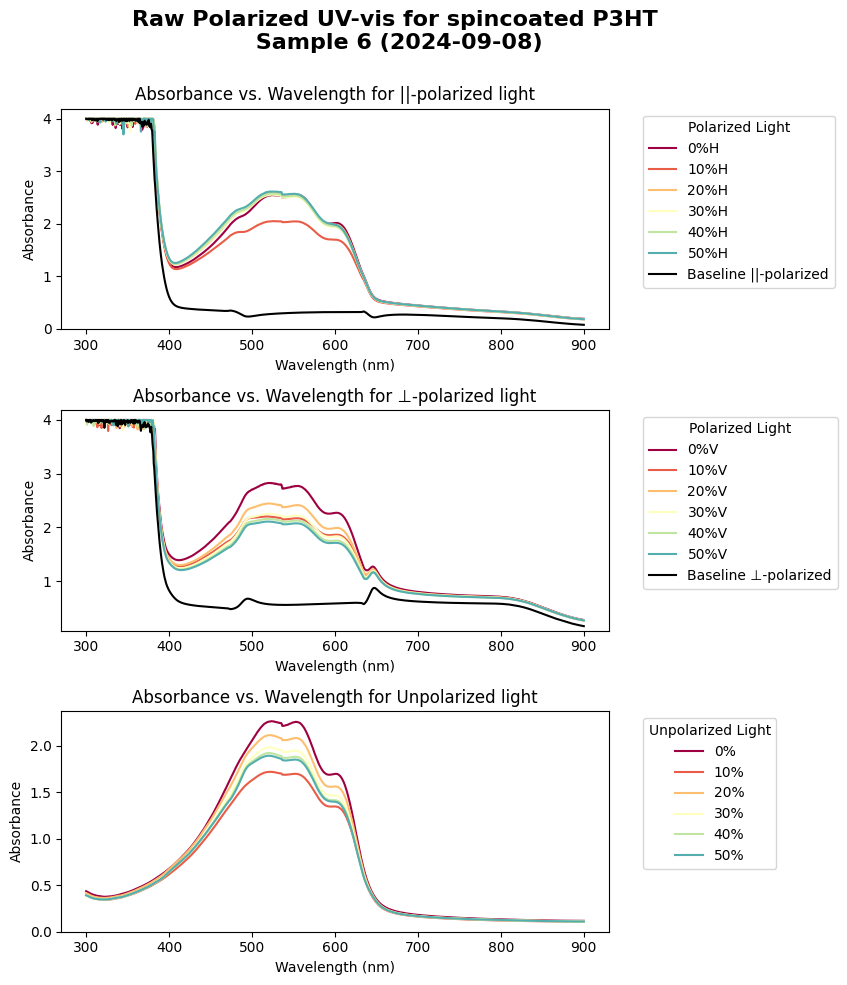

In [17]:
##### plotting the raw data #####
fig,axs = plot_polarized_UVvis(raw_df, bw=None, ylim=(None),title=f'Raw Polarized UV-vis for {method_str} {material_str}\n Sample {s_num} ({date_str})\n')
axs[0].plot(raw_df['Wavelength'], raw_df['H_baseline'], label="Baseline ||-polarized", color='k')
axs[1].plot(raw_df['Wavelength'], raw_df['V_baseline'], label="Baseline ⊥-polarized", color='k')
axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

In [18]:
# removee bad data at 10% strain for sample 6
if file_path == 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 6 Raw Data.csv':
    raw_df.drop(columns=[col for col in raw_df.columns if '10%' in col], inplace=True)
raw_df

,Wavelength,0%,0%H,0%V,20%,20%H,20%V,30%,30%H,30%V,40%,40%H,40%V,50%,50%H,50%V,V_baseline,H_baseline
0,300.0,0.433788,4.000000,4.000000,0.413223,4.000000,4.000000,0.392195,4.000000,4.000000,0.388122,4.000000,3.983489,0.389276,4.000000,4.000000,4.000000,4.000000
1,300.5,0.431662,4.000000,4.000000,0.411178,4.000000,4.000000,0.390284,4.000000,4.000000,0.386125,3.994737,3.994713,0.387221,4.000000,4.000000,3.973701,4.000000
2,301.0,0.429235,4.000000,4.000000,0.408850,3.988463,4.000000,0.388094,4.000000,4.000000,0.384006,4.000000,3.910665,0.385221,4.000000,4.000000,3.994414,3.992867
3,301.5,0.426603,3.988345,3.970443,0.406354,4.000000,3.967144,0.385892,3.961568,4.000000,0.382072,4.000000,3.947889,0.382982,4.000000,4.000000,3.980757,3.989014
4,302.0,0.423869,4.000000,3.957882,0.403841,4.000000,4.000000,0.383576,4.000000,4.000000,0.379584,4.000000,4.000000,0.380788,4.000000,4.000000,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.114587,0.186523,0.278575,0.109067,0.181073,0.272261,0.107643,0.179332,0.270136,0.106552,0.179977,0.269247,0.107526,0.181269,0.270606,0.165349,0.072880
1197,898.5,0.114585,0.186335,0.276814,0.109018,0.180786,0.270555,0.107635,0.178956,0.268486,0.106583,0.179411,0.267587,0.107543,0.180684,0.269052,0.163506,0.072257
1198,899.0,0.114699,0.185847,0.275167,0.109107,0.180272,0.269082,0.107733,0.178480,0.267099,0.106671,0.179022,0.266326,0.107642,0.180425,0.267970,0.161557,0.071873
1199,899.5,0.114711,0.185530,0.273863,0.109118,0.180015,0.268090,0.107773,0.178187,0.266163,0.106599,0.178752,0.265403,0.107643,0.180003,0.266969,0.159992,0.071622


In [19]:
#### baseline correction ####
# formula used
formula = r"$A_{\text{corrected}} = A_{\text{raw}} - A_{\text{baseline}}$"

df_corrected = raw_df.copy()
for i, column in enumerate([col for col in df_corrected.columns if 'H' in col and 'baseline' not in col]):
    print(column)
    print(AtoT(df_corrected['H_baseline'].values))
    df_corrected[column] = raw_df[column].values - raw_df['H_baseline'].values#TtoA( AtoT(raw_df[column].values) / AtoT(raw_df['H_baseline'].values))
    # df_corrected[column] = 1 - ((1 - df_corrected[column].values) / (1 - df_corrected['H_baseline'].values))
    # corrected_values = (1 - df_corrected[column].values) / (1 - df_corrected['H_baseline'].values)
    # clamped_values = np.clip(corrected_values, 0, 1)
    # df_corrected[column] = 1 - clamped_values

for i, column in enumerate([col for col in df_corrected.columns if 'V' in col and 'baseline' not in col]):
    print(column)
    # df_corrected[column] = 1 - ((1 - df_corrected[column].values) / (1 - df_corrected[' V_baseline'].values))
    df_corrected[column] = raw_df[column].values - raw_df['V_baseline'].values#TtoA(AtoT(raw_df[column].values) / AtoT(raw_df['V_baseline'].values))

df_corrected

0%H
[1.00000000e-04 1.00000000e-04 1.01655918e-04 ... 8.47474553e-01
 8.47964492e-01 8.48829244e-01]
20%H
[1.00000000e-04 1.00000000e-04 1.01655918e-04 ... 8.47474553e-01
 8.47964492e-01 8.48829244e-01]
30%H
[1.00000000e-04 1.00000000e-04 1.01655918e-04 ... 8.47474553e-01
 8.47964492e-01 8.48829244e-01]
40%H
[1.00000000e-04 1.00000000e-04 1.01655918e-04 ... 8.47474553e-01
 8.47964492e-01 8.48829244e-01]
50%H
[1.00000000e-04 1.00000000e-04 1.01655918e-04 ... 8.47474553e-01
 8.47964492e-01 8.48829244e-01]
0%V
20%V
30%V
40%V
50%V


,Wavelength,0%,0%H,0%V,20%,20%H,20%V,30%,30%H,30%V,40%,40%H,40%V,50%,50%H,50%V,V_baseline,H_baseline
0,300.0,0.433788,0.000000,0.000000,0.413223,0.000000,0.000000,0.392195,0.000000,0.000000,0.388122,0.000000,-0.016511,0.389276,0.000000,0.000000,4.000000,4.000000
1,300.5,0.431662,0.000000,0.026299,0.411178,0.000000,0.026299,0.390284,0.000000,0.026299,0.386125,-0.005263,0.021012,0.387221,0.000000,0.026299,3.973701,4.000000
2,301.0,0.429235,0.007133,0.005586,0.408850,-0.004404,0.005586,0.388094,0.007133,0.005586,0.384006,0.007133,-0.083749,0.385221,0.007133,0.005586,3.994414,3.992867
3,301.5,0.426603,-0.000669,-0.010314,0.406354,0.010986,-0.013613,0.385892,-0.027446,0.019243,0.382072,0.010986,-0.032868,0.382982,0.010986,0.019243,3.980757,3.989014
4,302.0,0.423869,0.007216,-0.042118,0.403841,0.007216,0.000000,0.383576,0.007216,0.000000,0.379584,0.007216,0.000000,0.380788,0.007216,0.000000,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.114587,0.113643,0.113226,0.109067,0.108193,0.106912,0.107643,0.106452,0.104787,0.106552,0.107097,0.103898,0.107526,0.108389,0.105257,0.165349,0.072880
1197,898.5,0.114585,0.114078,0.113308,0.109018,0.108529,0.107049,0.107635,0.106699,0.104980,0.106583,0.107154,0.104081,0.107543,0.108427,0.105546,0.163506,0.072257
1198,899.0,0.114699,0.113974,0.113610,0.109107,0.108399,0.107525,0.107733,0.106607,0.105542,0.106671,0.107149,0.104769,0.107642,0.108552,0.106413,0.161557,0.071873
1199,899.5,0.114711,0.113908,0.113871,0.109118,0.108393,0.108098,0.107773,0.106565,0.106171,0.106599,0.107130,0.105411,0.107643,0.108381,0.106977,0.159992,0.071622


Saved to Carlos_P3HT_9-8-24/Carlos_Polarized_UVvis_S6_spincoated_P3HT_2024-09-08.pdf


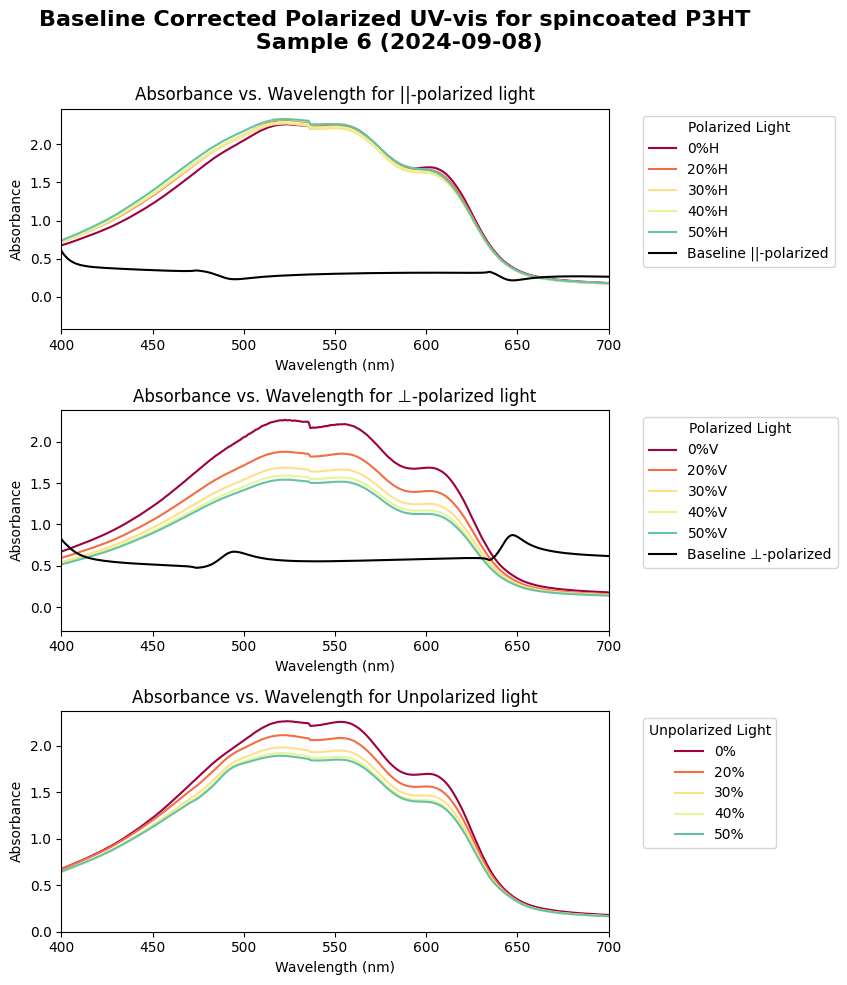

In [25]:
##### plotting final corected #####
fig,axs = plot_polarized_UVvis(df_corrected, title=f'Baseline Corrected Polarized UV-vis for {method_str} {material_str}\n Sample {s_num} ({date_str})\n', bw=(400,700), ylim = None, plot_transmittance=False)
# axs[0].text(0.75, 0.9, formula, fontsize=12, ha='center', va='center', transform=axs[0].transAxes)

#plottine overides
axs[0].plot(df_corrected['Wavelength'], df_corrected['H_baseline'], label="Baseline ||-polarized", color='k')
axs[1].plot(df_corrected['Wavelength'], df_corrected['V_baseline'], label="Baseline ⊥-polarized", color='k')
axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
# axs[2].set_ylim((.4,.8))

save_str = f"Carlos_P3HT_9-8-24/Carlos_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.pdf"

fig.savefig(save_str, format='pdf')
print(f"Saved to {save_str}")

In [21]:
# check against theoreticl absornce
# @520 nm for 0% strain

base_perp = 0.5700448375 #baseline in perp direction to strain T = 43%
base_par = 0.53813391    #basliine in par direction T= 47%

aperp = 0.8158275       #final absorbacnce for perp (with polarizer and sample)
apar = 0.843952         #final absornace for par (with polarize in sample)
a_unpolarized = 0.77783525  #absorbace without polarize

base_Tperp = AtoT(base_perp)
base_Tpar = AtoT(base_par)
Tperp = AtoT(aperp)
Tpar = AtoT(apar)
T_unpolarized = AtoT(a_unpolarized)

print("\nbase_perp, base_par, base_Tperp, base_Tpar")
print(base_perp, base_par, base_Tperp, base_Tpar)


print("\nTperp,Tpar,T_unpolarized")
print(Tperp,Tpar,T_unpolarized)


Tout =  (T_unpolarized * base_Tperp + T_unpolarized * base_Tpar)
Aout = TtoA(Tout)
print("\nPredicted Tout,nPredicted Aout")
print(Tout, Aout)




base_perp, base_par, base_Tperp, base_Tpar
0.5700448375 0.53813391 0.2691256938406411 0.28964503609003395

Tperp,Tpar,T_unpolarized
0.15281729217708664 0.1432346199277711 0.16678798042513085

Predicted Tout,nPredicted Aout
0.09319624156581352 1.0306016015960242


In [22]:
#560 nm from machine
AtoT(np.array([2.434,2.89,2.745 ]))
TtoA(np.array([.004,.001,.002]))




array([2.39794001, 3.        , 2.69897   ])

In [23]:
#560nm
T0f = AtoT(raw_df['0%'][520])
T0Hf = AtoT(raw_df['0%H'][520])
T0Vf = AtoT(raw_df['0%V'][520])
print("(T0f,T0Hf,T0Vf)")
print(T0f,T0Hf,T0Vf,'\n')

# T_unpolarized = AtoT(raw_df['20%'][520])


TbH = AtoT(raw_df['H_baseline'][520])
TbV = AtoT(raw_df['V_baseline'][520])
print("(TbH,TbV)")
print(TbH,TbV)

THsample = T0Hf/TbH
print("THSample")
print(THsample)






(T0f,T0Hf,T0Vf)
0.005988499256890205 0.0029742673248991424 0.0017716747678302135 

(TbH,TbV)
0.49536881930172044 0.2751954822364897
THSample
0.006004147231333041
